In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as im
import random
%autosave 190

Autosaving every 190 seconds


In [2]:
#all library needed for CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG19, DenseNet201, DenseNet121
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GroupShuffleSplit

import os
import cv2

In [3]:
dir_dataset = r'C:\CSU class\Calss 2022 Spring Local\DSCI 478\Final Project\Datasets'

In [17]:
expic = os.path.join(dir_dataset, 'Train')
expic = os.path.join(expic, 'images')
expic = os.path.join(expic, 'Ascaris_434_jpg.rf.3a16754f3edda0934d87e94eadec4c92.jpg')

In [18]:
# expic = os.path.join(dir_dataset, 'Ascaris_434_jpg.rf.3a16754f3edda0934d87e94eadec4c92.jpg')
img = im.open(expic)
img.show()

In [22]:
print(img.mode)

RGB


In [34]:
np.array(img.resize((150, 150))).shape

(150, 150, 3)

In [38]:
np.array(img).shape

(4000, 3000, 3)

Getting training dataset from files

In [27]:
path = os.path.join(dir_dataset, "Train")
path = os.path.join(path, "images")
dir_list = os.listdir(path)
dir_list

['Ascaris-lumbricoides_1009_jpg.rf.149f06691df0df97e94f544988824f81.jpg',
 'Ascaris-lumbricoides_1010_jpg.rf.5f7b2e5c9cd6b8ee5c8ecc97e010ef97.jpg',
 'Ascaris-lumbricoides_1057_jpg.rf.9205da8bb956601a0780c2252f9cc2d5.jpg',
 'Ascaris-lumbricoides_1058_jpg.rf.b7909e552a586c08c96febc3a20864cf.jpg',
 'Ascaris-lumbricoides_1059_jpg.rf.4cd574e29a9db4fef2f403c629b271d1.jpg',
 'Ascaris-lumbricoides_1068_jpg.rf.d7ddb2613189c1ff959bf8e169c94714.jpg',
 'Ascaris-lumbricoides_1069_jpg.rf.8e0c46f32ed972f11426df9a6f687fb9.jpg',
 'Ascaris-lumbricoides_1075_jpg.rf.0e4680b00b42abceac4c0621997f120b.jpg',
 'Ascaris-lumbricoides_1076_jpg.rf.d27cea5110cbcdeeb1d026785060c5bc.jpg',
 'Ascaris-lumbricoides_1077_jpg.rf.6414cff9475ae9fe567f63accb8a09af.jpg',
 'Ascaris-lumbricoides_1086_jpg.rf.fc88c933714b3e15d99afea0754e208b.jpg',
 'Ascaris-lumbricoides_1087_jpg.rf.28dfa95dc0ecb38cadf1c49508d03dfe.jpg',
 'Ascaris-lumbricoides_1088_jpg.rf.1336cf64ad2aecf2860dcecfc046a885.jpg',
 'Ascaris-lumbricoides_1119_jpg.rf.94a

In [36]:
a = dir_list[0]
a.split('-')

['Ascaris', 'lumbricoides_1009_jpg.rf.149f06691df0df97e94f544988824f81.jpg']

In [37]:
path

'C:\\CSU class\\Calss 2022 Spring Local\\DSCI 478\\Final Project\\Datasets\\Train\\images'

In [46]:
labels = list()
train = list()
for i in range(len(dir_list)):
    if '-' in dir_list[i]:
        temp1 = dir_list[i].split('-')[0]
        labels.append(temp1)
    else:
        temp1 = dir_list[i].split('_')[0]
        labels.append(temp1)
    
    imgPath = os.path.join(path, dir_list[i])
    img = im.open(imgPath)
    img = img.resize((150,150))
    temp2 = np.array(img)
    train.append(temp2)
    if (i % 100 == 0) or i == (len(dir_list) - 1):
        print(i)

0
100
200
300
400
500
600
700
800
855


In [49]:
np.unique(labels)
dic = dict()
for name in labels:
    if not name in dic:
        dic[name] = 1
    else:
        dic[name] += 1

In [51]:
pd.Series(dic)

Ascaris         151
Echinostoma      33
Echino           82
Hookworm         19
hookworms        60
MIF              78
Opisthorchis     12
OV               91
Taenia          226
Trichuris       104
dtype: int64

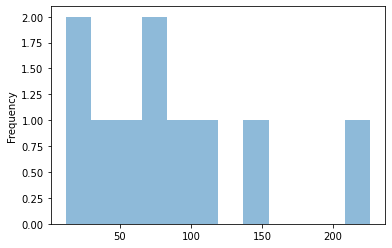

In [55]:
ax = pd.Series(dic).plot.hist(bins = 12, alpha = 0.5)

In [58]:
np.array(train).shape, np.array(labels).shape

((856, 150, 150, 3), (856,))

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(
    np.array(train), np.array(labels), test_size=.2, random_state=1)

In [62]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((684, 150, 150, 3), (172, 150, 150, 3), (684,), (172,))

In [63]:
len(dic)

10

Start trainng model

In [64]:
model = tf.keras.models.Sequential([    


        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(32, 32, 3)),
#         tf.keras.layers.Flatten(input_shape = (28, 28)),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Dropout(0.10),

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.30),
    
        
    
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.50),
        tf.keras.layers.Dense(10, activation='softmax')
    
    
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
#               loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 512)       590336    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 512)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 1024)        4

In [66]:
data_train = ImageDataGenerator(
    rotation_range = 8,
#     zoom_range=0.1
)
train_gen = data_train.flow(xtrain, ytrain, batch_size = 16, shuffle = True)

In [ ]:
history = model.fit(train_gen, )